In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sales.csv')
print(data.head())
data.dtypes

         日期   销量
0  20200101  237
1  20200102  243
2  20200103  257
3  20200104  254
4  20200105  246


日期    int64
销量    int64
dtype: object

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
data = pd.read_csv('Sales.csv', parse_dates=['日期'], index_col='日期',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())


 Parsed Data:
             销量
日期             
2020-01-01  237
2020-01-02  243
2020-01-03  257
2020-01-04  254
2020-01-05  246


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [4]:
data.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23'],
              dtype='datetime64[ns]', name='日期', length=144, freq=None)

In [5]:
ts = data['销量']
ts.head(10)

日期
2020-01-01    237
2020-01-02    243
2020-01-03    257
2020-01-04    254
2020-01-05    246
2020-01-06    260
2020-01-07    273
2020-01-08    273
2020-01-09    261
2020-01-10    244
Name: 销量, dtype: int64

In [6]:
ts['2020-01-02']

243

In [7]:
ts['2020-01-02 ':'2020-01-09 ']

日期
2020-01-02    243
2020-01-03    257
2020-01-04    254
2020-01-05    246
2020-01-06    260
2020-01-07    273
2020-01-08    273
2020-01-09    261
Name: 销量, dtype: int64

In [8]:
ts[:'2020-01-08']

日期
2020-01-01    237
2020-01-02    243
2020-01-03    257
2020-01-04    254
2020-01-05    246
2020-01-06    260
2020-01-07    273
2020-01-08    273
Name: 销量, dtype: int64

In [9]:
ts['2020-01']

日期
2020-01-01    237
2020-01-02    243
2020-01-03    257
2020-01-04    254
2020-01-05    246
2020-01-06    260
2020-01-07    273
2020-01-08    273
2020-01-09    261
2020-01-10    244
2020-01-11    229
2020-01-12    243
2020-01-13    240
2020-01-14    251
2020-01-15    266
2020-01-16    260
2020-01-17    250
2020-01-18    274
2020-01-19    295
2020-01-20    295
2020-01-21    283
2020-01-22    258
2020-01-23    239
2020-01-24    265
2020-01-25    270
2020-01-26    275
2020-01-27    303
2020-01-28    288
2020-01-29    297
2020-01-30    303
2020-01-31    324
Name: 销量, dtype: int64

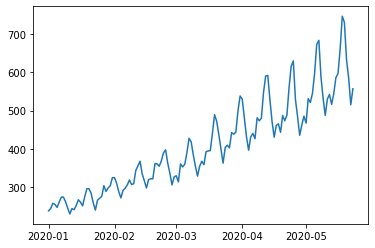

In [10]:
plt.plot(ts)

In [11]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 6.7 MB/s eta 0:00:01     |█████████████▉                  | 4.1 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 32.5 MB/s eta 0:00:01


In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

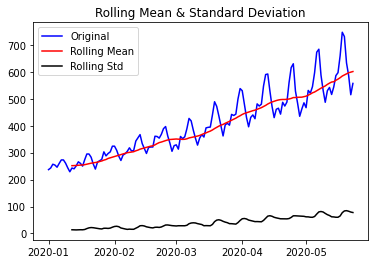

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
test_stationarity(ts)

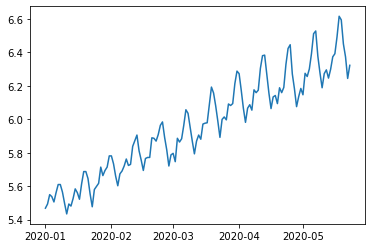

In [14]:
ts_log = np.log(ts)
plt.plot(ts_log)

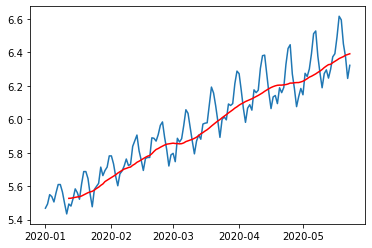

In [15]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color ='red')

In [16]:
ts_log_moving_avg_diff = ts_log - moving_avg 
ts_log_moving_avg_diff.head(15)

日期
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
2020-01-10         NaN
2020-01-11         NaN
2020-01-12   -0.033685
2020-01-13   -0.047156
2020-01-14   -0.005041
2020-01-15    0.050134
Name: 销量, dtype: float64

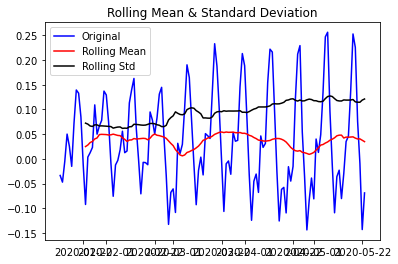

Results of Dickey-Fuller Test:
Test Statistic                  -3.518434
p-value                          0.007526
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [17]:
ts_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(ts_log_moving_avg_diff)

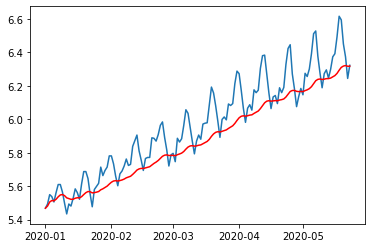

In [18]:
expwighted_avg = pd.DataFrame.ewm(ts_log,halflife = 12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg,color ='red')

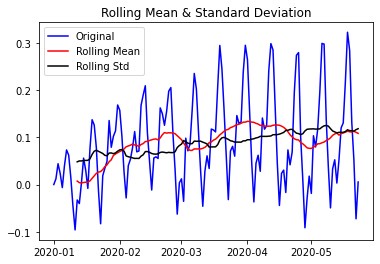

Results of Dickey-Fuller Test:
Test Statistic                  -3.234394
p-value                          0.018078
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
ts_log_ewma_diff = ts_log-expwighted_avg 
test_stationarity(ts_log_ewma_diff)

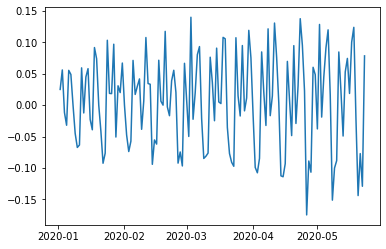

In [20]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

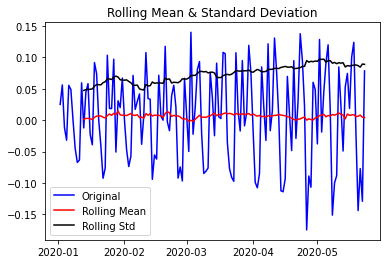

Results of Dickey-Fuller Test:
Test Statistic                  -3.423486
p-value                          0.010184
#Lags Used                      13.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [21]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

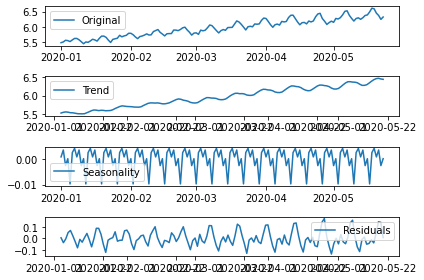

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

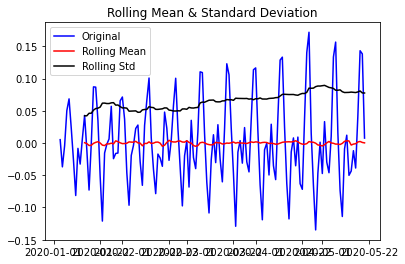

Results of Dickey-Fuller Test:
Test Statistic                  -4.628131
p-value                          0.000115
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [23]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [24]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [25]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


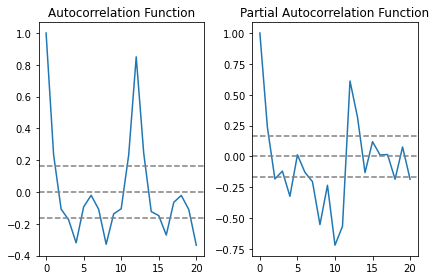

In [26]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [27]:
from statsmodels.tsa.arima_model import ARIMA

/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so infe

Text(0.5, 1.0, 'RSS: 0.6780')

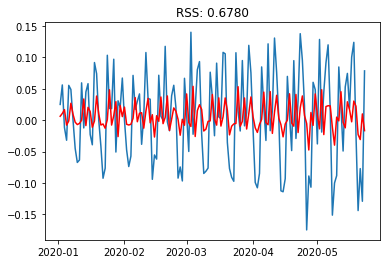

In [28]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.6674')

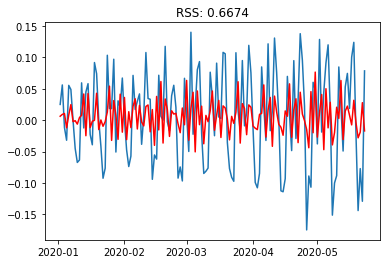

In [29]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filt

Text(0.5, 1.0, 'RSS: 0.4507')

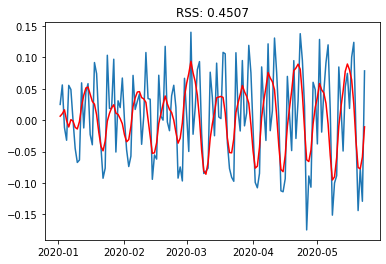

In [30]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [31]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

日期
2020-01-02    0.006307
2020-01-03    0.010219
2020-01-04    0.016414
2020-01-05   -0.000640
2020-01-06   -0.010863
dtype: float64

In [32]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

日期
2020-01-02    0.006307
2020-01-03    0.016526
2020-01-04    0.032940
2020-01-05    0.032300
2020-01-06    0.021437
dtype: float64

In [33]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

日期
2020-01-01    5.468060
2020-01-02    5.474367
2020-01-03    5.484586
2020-01-04    5.501000
2020-01-05    5.500360
dtype: float64

Text(0.5, 1.0, 'RMSE: 56.0519')

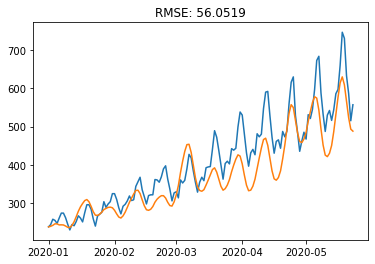

In [34]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))